In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('TATAMOTORS.NS.csv')

# Data Preprocessing
X = data.drop(['Open', 'Close', 'Date'], axis=1)
y_open = data['Open']
y_close = data['Close']

# Splitting the data into train and test sets
X_train, X_test, y_open_train, y_open_test, y_close_train, y_close_test = train_test_split(X, y_open, y_close, test_size=0.2, random_state=42)

# Pipeline for SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR())
])

# Grid search for SVM hyperparameters
svm_param_grid = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_open_train)

# Pipeline for Random Forest
rf_pipeline = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

# Grid search for Random Forest hyperparameters
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_open_train)

# Prediction for opening prices
svm_open_pred = svm_grid_search.predict(X_test)
rf_open_pred = rf_grid_search.predict(X_test)

# Prediction for closing prices
svm_close_pred = svm_grid_search.predict(X_test)
rf_close_pred = rf_grid_search.predict(X_test)

# Visualization
plt.figure(figsize=(10, 6))

# Get the dates corresponding to the test set
test_dates = data.iloc[X_test.index]['Date']

# Plot actual and predicted opening prices
plt.plot(test_dates, y_open_test.values, label='Actual Opening Price', color='blue')
plt.plot(test_dates, svm_open_pred, label='SVM Predicted Opening Price', linestyle='--', color='green')
plt.plot(test_dates, rf_open_pred, label='Random Forest Predicted Opening Price', linestyle='--', color='red')

# Plot actual and predicted closing prices
plt.plot(test_dates, y_close_test.values, label='Actual Closing Price', color='purple')
plt.plot(test_dates, svm_close_pred, label='SVM Predicted Closing Price', linestyle='-.', color='orange')
plt.plot(test_dates, rf_close_pred, label='Random Forest Predicted Closing Price', linestyle='-.', color='brown')

plt.title('Opening and Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Visualization
plt.figure(figsize=(10, 6))

# Get the dates corresponding to the test set
test_dates = data.iloc[X_test.index]['Date']

# Plot actual opening and closing prices
plt.plot(test_dates, y_open_test.values, label='Actual Opening Price', color='blue', marker='o')
plt.plot(test_dates, y_close_test.values, label='Actual Closing Price', color='purple', marker='o')

# Plot predicted opening prices for SVM and Random Forest
plt.plot(test_dates, svm_open_pred, label='SVM Predicted Opening Price', linestyle='-', color='green', marker='x')
plt.plot(test_dates, rf_open_pred, label='Random Forest Predicted Opening Price', linestyle='-', color='red', marker='^')

# Plot predicted closing prices for SVM and Random Forest
plt.plot(test_dates, svm_close_pred, label='SVM Predicted Closing Price', linestyle='-', color='orange', marker='x')
plt.plot(test_dates, rf_close_pred, label='Random Forest Predicted Closing Price', linestyle='-', color='brown', marker='^')

plt.title('Opening and Closing Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.grid(True)  # Add grid lines for better readability
plt.show()

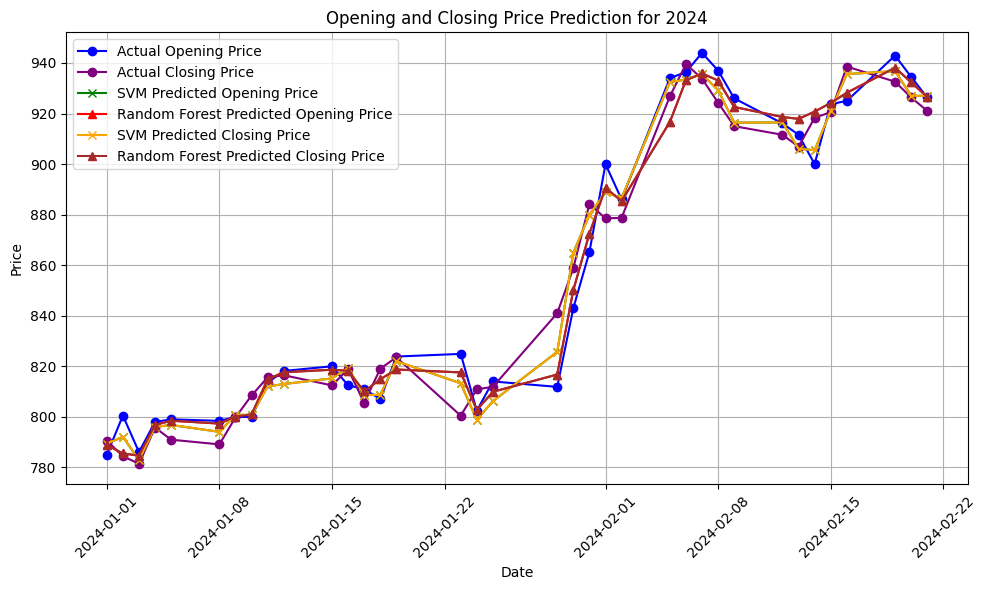

In [ ]:
# Filter data for the year 2024
data_2024 = data[data['Date'].dt.year == 2024]

# Data Preprocessing for the year 2024
X_2024 = data_2024.drop(['Open', 'Close', 'Date'], axis=1)
y_open_2024 = data_2024['Open']
y_close_2024 = data_2024['Close']

# Prediction for the year 2024
svm_open_pred_2024 = svm_grid_search.predict(X_2024)
rf_open_pred_2024 = rf_grid_search.predict(X_2024)
svm_close_pred_2024 = svm_grid_search.predict(X_2024)
rf_close_pred_2024 = rf_grid_search.predict(X_2024)

# Visualization for the year 2024
plt.figure(figsize=(10, 6))

# Plot actual opening and closing prices for the year 2024
plt.plot(data_2024['Date'], y_open_2024, label='Actual Opening Price', color='blue', marker='o')
plt.plot(data_2024['Date'], y_close_2024, label='Actual Closing Price', color='purple', marker='o')

# Plot predicted opening prices for SVM and Random Forest for the year 2024
plt.plot(data_2024['Date'], svm_open_pred_2024, label='SVM Predicted Opening Price', linestyle='-', color='green', marker='x')
plt.plot(data_2024['Date'], rf_open_pred_2024, label='Random Forest Predicted Opening Price', linestyle='-', color='red', marker='^')

# Plot predicted closing prices for SVM and Random Forest for the year 2024
plt.plot(data_2024['Date'], svm_close_pred_2024, label='SVM Predicted Closing Price', linestyle='-', color='orange', marker='x')
plt.plot(data_2024['Date'], rf_close_pred_2024, label='Random Forest Predicted Closing Price', linestyle='-', color='brown', marker='^')

plt.title('Opening and Closing Price Prediction for 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation for SVM
mae_svm = mean_absolute_error(y_open_test, svm_open_pred)
mse_svm = mean_squared_error(y_open_test, svm_open_pred)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_open_test, svm_open_pred)

print("SVM Metrics:")
print("MAE:", mae_svm)  #It represents the average absolute difference between the predicted and actual values. Lower values are better.
print("MSE:", mse_svm)  #It measures the average squared difference between the predicted and actual values. Lower values are better
print("RMSE:", rmse_svm) #It is the square root of MSE and is in the same unit as the target variable. Lower values are better.
print("R-squared:", r2_svm)  #It indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Closer to 1 means a better fit.

# Evaluation for Random Forest
mae_rf = mean_absolute_error(y_open_test, rf_open_pred)
mse_rf = mean_squared_error(y_open_test, rf_open_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_open_test, rf_open_pred)

print("\nRandom Forest Metrics:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)


SVM Metrics:
MAE: 38.0342151794804
MSE: 8687.49692034018
RMSE: 93.2067428909528
R-squared: 0.7257150384286903

Random Forest Metrics:
MAE: 3.2969882813597695
MSE: 23.08128994113688
RMSE: 4.8042991102903745
R-squared: 0.9992712687230199
